# Generic Tensor Fitting

`quimb` has support for fitting arbitrary tensor networks to other tensors or tensor networks.
Here we show decomposing a 4-tensor into a ring.

In [1]:
%config InlineBackend.figure_formats = ['svg']
import numpy as np
import quimb.tensor as qtn

Create a target 10x10x10x10 tensor with uniform positive entries:

In [2]:
t_target = qtn.Tensor(
    data=np.random.uniform(size=(10, 10, 10, 10)),
    inds=('a', 'b', 'c', 'd'),
)
t_target

Tensor(shape=(10, 10, 10, 10), inds=('a', 'b', 'c', 'd'), tags=oset([]))

In [3]:
# normalize for better sense of how good the fit is
t_target /= t_target.norm()

The target could also be an arbitrary tensor network.

Now we manually create the decomposed geometry, i.e. a ring of 4 tensors.

In [4]:
rank = 5

tn_guess = qtn.TensorNetwork([
    qtn.Tensor(np.random.normal(size=(10, rank, rank)), inds=('a', 'left', 'up')),
    qtn.Tensor(np.random.normal(size=(10, rank, rank)), inds=('b', 'up', 'right')),
    qtn.Tensor(np.random.normal(size=(10, rank, rank)), inds=('c', 'right', 'bottom')),
    qtn.Tensor(np.random.normal(size=(10, rank, rank)), inds=('d', 'bottom', 'left')),
])
tn_guess

<TensorNetwork(tensors=4, indices=8)>

We could have any internal structure, as long as the other indices match (and 
the contraction is possible).

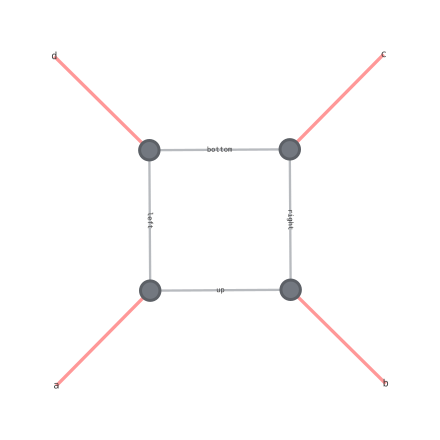

In [5]:
tn_guess.draw(show_inds='all', highlight_inds=['a', 'b', 'c', 'd'])

Compute the initial distance (in terms of frobeius norm):

In [6]:
tn_guess.distance(t_target)

2280.7571701008687

Perform the initial fitting using ALS (alternating least squares), see the 
function [`TensorNetwork.fit`](TensorNetwork.fit) for more details:

In [7]:
tn_fitted = tn_guess.fit(t_target, method='als', steps=1000, progbar=True)

0.4444485069478256: 100%|██████████| 1000/1000 [00:04<00:00, 206.22it/s]


Sometimes, autodiff based optimization can do better than ALS, see
[`TNOptimizer`](TNOptimizer) for more details:

In [8]:
tn_fitted.fit_(t_target, method='autodiff', steps=1000, progbar=True)

+0.444448504743 [best: +0.444448504743] :   0%|          | 5/1000 [00:00<00:15, 63.55it/s]   


<TensorNetwork(tensors=4, indices=8)>

Double check the new fitted tensor network is close to the target:

In [9]:
tn_fitted.distance(t_target)

0.4444485047431454

Considering the target as a wavefunction, our fitted network has an overlap of:

In [14]:
tn_fitted @ t_target.H

0.8024680879837433

Note random tensors are generally not that easy to fit, resulting in a not 
great fidelity.